In [ ]:
!pip install yolov5
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.5/953.5 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.5/113.5 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.8 MB/s eta 0:00:00
   

In [ ]:
import cv2
from google.colab import files , drive
import zipfile
import os
from ultralytics import YOLO
import shutil
import glob
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from roboflow import Roboflow
import random
import shutil
import yaml

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
rf = Roboflow(api_key="yfIresHopuiQZKxTJkfi")
project = rf.workspace("yolo-qpq86").project("sign-language-xpq5z-0chb6")
version = project.version(1)
dataset = version.download("yolov8-obb")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Sign-Language-1 in yolov8-obb:: 100%|██████████| 59937/59937 [00:08<00:00, 7333.57it/s]


In [ ]:
image_dir = '/content/Sign-Language-1/train/images'
label_dir = '/content/Sign-Language-1/train/labels'
output_dir = '/content/Sign-Language-1'

In [ ]:
train_ratio = 0.9

image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))]

random.shuffle(image_files)
train_count = int(len(image_files) * train_ratio)
train_files = image_files[:train_count]
val_files = image_files[train_count:]


✅ Found 29961 images
✅ Done splitting dataset.


In [ ]:
def move_files(file_list, split):
    for file in file_list:
        image_path = os.path.join(image_dir, file)
        label_name = os.path.splitext(file)[0] + ".txt"
        label_path = os.path.join(label_dir, label_name)

        os.makedirs(f'{output_dir}/images/{split}', exist_ok=True)
        os.makedirs(f'{output_dir}/labels/{split}', exist_ok=True)

        if os.path.exists(image_path):
            if os.path.exists(label_path):
            shutil.copy(label_path, f'{output_dir}/labels/{split}/{label_name}')
            shutil.copy(image_path, f'{output_dir}/images/{split}/{file}')
        else:
            print(f" Missing image or label : {image_path} or {label_path}")

In [ ]:
move_files(train_files, 'train')
move_files(val_files, 'val')

In [ ]:
class_names = [
    "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T",
    "U", "V", "W", "X", "Y", "Z", "additional", "alcohol", "allergy", "bacon", "bad", "bag", "barbecue",
    "bill", "biscuit", "bitter", "bread", "burger", "bye", "cake", "cash", "cheese", "chicken", "coke",
    "cold", "correct", "cost", "coupon", "credit card", "cup", "dessert", "don-t want", "drink", "drive",
    "eat", "eggs", "enjoy", "fine", "forget", "fork", "french fries", "fresh", "go", "hello", "help",
    "hot", "icecream", "ingredients", "juicy", "ketchup", "lactose", "lettuce", "lid", "like", "manager",
    "menu", "milk", "more", "mustard", "napkin", "need", "no", "not", "order", "pepper", "pickle", "pizza",
    "please", "ready", "receipt", "refill", "repeat", "safe", "salt", "sandwich", "sauce", "small", "soda",
    "sorry", "spicy", "spoon", "straw", "sugar", "sweet", "thank-you", "tissues", "tomato", "total",
    "urgent", "vegetables", "wait", "want", "warm", "water", "what", "would", "wrong", "yes", "yoghurt", "your"
]

data_yaml = {
    'train': '/content/Sign-Language-1/images/train',
    'val': '/content/Sign-Language-1/images/val',
    'nc': len(class_names),
    'names': {i: name for i, name in enumerate(class_names)}
}

yaml_path = '/content/Sign-Language-1/data.yaml'
with open(yaml_path, 'w') as f:
    yaml.dump(data_yaml, f, default_flow_style=False)

print(f"data.yaml created at: {yaml_path}")


✅ data.yaml created at: /content/Sign-Language-1/data.yaml


# hugging face

In [ ]:
dataset = load_dataset("Marxulia/asl_sign_languages_alphabets_v03", download_mode="force_redownload")
print(f"Train dataset size: {len(dataset['train'])}")

train-00000-of-00001.parquet:   0%|          | 0.00/74.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/10873 [00:00<?, ? examples/s]

Train dataset size: 10873


# kaggle dataset about 1700 image

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdelrahmantamer72","key":"bb944079018d098131bcae9b53602074"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Train : 1500 , Val :144 , Test 54

In [ ]:
!kaggle datasets download -d daskoushik/sign-language-dataset-for-yolov7

Dataset URL: https://www.kaggle.com/datasets/daskoushik/sign-language-dataset-for-yolov7
License(s): unknown
  0% 0.00/40.7M [00:00<?, ?B/s]
100% 40.7M/40.7M [00:00<00:00, 1.34GB/s]


In [ ]:
!unzip -q sign-language-dataset-for-yolov7.zip -d sign-language
!ls sign-language

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


# Yolo Model

In [ ]:
model = YOLO('/content/drive/MyDrive/model_with_big_data_first15.pt')

In [ ]:
results = model.train(
    data='/content/Sign-Language-1/data.yaml',
    epochs=15,
    project='sign_language',
    name='log',
    device=[0],
    # resume=True,
    batch=64,
    exist_ok=True,
    optimizer='AdamW',
    dropout=0.2
)

Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Sign-Language-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.2, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/model_with_big_data_first15.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=log, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspe

train: Scanning /content/Sign-Language-1/labels/train.cache... 26964 images, 25 backgrounds, 0 corrupt: 100%|██████████| 26964/26964 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 468.2±251.9 MB/s, size: 18.7 KB)


val: Scanning /content/Sign-Language-1/labels/val.cache... 2997 images, 5 backgrounds, 0 corrupt: 100%|██████████| 2997/2997 [00:00<?, ?it/s]


Plotting labels to sign_language/log/labels.jpg... 


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e1a62f96ca0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^Exception ignored in: ^<function _MultiProcessingDataLoaderIter.__del__ at 0x7e1a62f96ca0>^
^Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
^    ^^self._shutdown_workers()
^  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
^    ^if w.is_alive():
^ ^  ^^  ^  ^^^^^^

optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to sign_language/log
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      9.36G      1.377      1.773      1.489         40        640: 100%|██████████| 422/422 [08:29<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:26<00:00,  1.12s/it]


                   all       2997       3046      0.577      0.593      0.627      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      9.32G      1.366      1.724      1.478         38        640: 100%|██████████| 422/422 [08:16<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:27<00:00,  1.14s/it]


                   all       2997       3046      0.585      0.626      0.655      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      9.31G      1.386      1.738      1.494         53        640: 100%|██████████| 422/422 [08:22<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:27<00:00,  1.13s/it]


                   all       2997       3046      0.717       0.69      0.737      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      9.31G      1.379      1.703      1.488         43        640: 100%|██████████| 422/422 [08:28<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:26<00:00,  1.12s/it]


                   all       2997       3046      0.731      0.712      0.788        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      9.31G       1.34      1.606      1.458         44        640: 100%|██████████| 422/422 [08:24<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:26<00:00,  1.12s/it]


                   all       2997       3046      0.768      0.765      0.823       0.54
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      9.31G      1.159     0.9099      1.468         20        640: 100%|██████████| 422/422 [07:46<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:26<00:00,  1.09s/it]


                   all       2997       3046      0.779       0.79      0.849      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      8.83G      1.112     0.8121      1.423         20        640: 100%|██████████| 422/422 [07:34<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:27<00:00,  1.13s/it]

                   all       2997       3046      0.787      0.842      0.865      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      9.31G      1.076     0.7452       1.39         21        640: 100%|██████████| 422/422 [07:40<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:26<00:00,  1.12s/it]

                   all       2997       3046      0.871      0.839      0.897      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      9.31G      1.045     0.6991      1.364         20        640: 100%|██████████| 422/422 [07:39<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:26<00:00,  1.12s/it]

                   all       2997       3046      0.845      0.885      0.914      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      8.83G      1.012     0.6518      1.342         20        640: 100%|██████████| 422/422 [07:37<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:26<00:00,  1.12s/it]

                   all       2997       3046      0.902      0.888      0.925      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      8.83G     0.9756      0.605      1.311         20        640: 100%|██████████| 422/422 [07:37<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:26<00:00,  1.10s/it]


                   all       2997       3046      0.911      0.894      0.936        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      9.31G     0.9476     0.5676      1.287         20        640: 100%|██████████| 422/422 [07:36<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:25<00:00,  1.08s/it]


                   all       2997       3046        0.9      0.921      0.944      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      9.31G     0.9223     0.5386      1.268         20        640: 100%|██████████| 422/422 [07:33<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:26<00:00,  1.12s/it]

                   all       2997       3046      0.946      0.906      0.951      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      9.31G     0.8971     0.5081      1.248         20        640: 100%|██████████| 422/422 [07:38<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:26<00:00,  1.12s/it]

                   all       2997       3046      0.942       0.91       0.96      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      9.31G     0.8721     0.4864       1.23         20        640: 100%|██████████| 422/422 [07:41<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:25<00:00,  1.07s/it]

                   all       2997       3046      0.953      0.911      0.963      0.741



15 epochs completed in 2.093 hours.
Optimizer stripped from sign_language/log/weights/last.pt, 6.9MB
Optimizer stripped from sign_language/log/weights/best.pt, 6.9MB

Validating sign_language/log/weights/best.pt...
Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,346,784 parameters, 0 gradients, 9.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:31<00:00,  1.32s/it]


                   all       2997       3046      0.953      0.911      0.963      0.741
                     A         21         21      0.879      0.952      0.978      0.833
                     B         14         14          1      0.562      0.902      0.746
                     C         20         20       0.89        0.7      0.894       0.71
                     D         15         15      0.848      0.744      0.804      0.685
                     E         24         24      0.955       0.75      0.897      0.798
                     F         23         23          1      0.826      0.935      0.786
                     G         21         21      0.946      0.836      0.912      0.699
                     H         17         17      0.927      0.824      0.963      0.784
                     I         25         25      0.947      0.712       0.87      0.732
                     J         20         20      0.943      0.823      0.912      0.738
                     

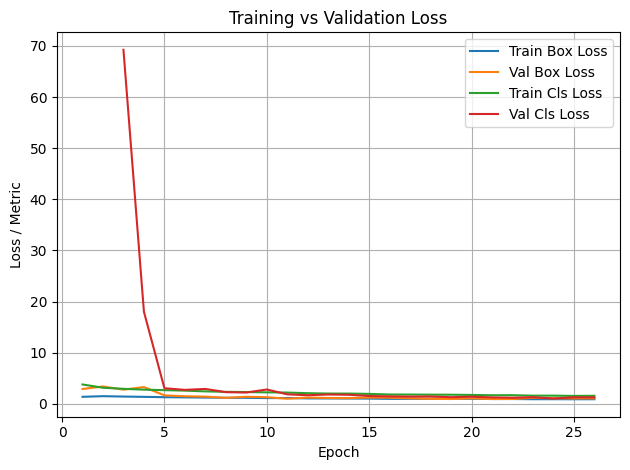

In [ ]:
df = pd.read_csv("/content/sign_language/log/results.csv")

plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Cls Loss')
plt.plot(df['epoch'], df['val/cls_loss'], label='Val Cls Loss')

plt.xlabel("Epoch")
plt.ylabel("Loss / Metric")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
drive.mount('/content/drive')

weights_path = results.save_dir / "weights" / "best.pt"

target_path = "/content/drive/MyDrive/model_with_big_data_first15.pt"

shutil.copy(weights_path, target_path)

Mounted at /content/drive


'/content/drive/MyDrive/model_with_big_data_first15.pt'

In [ ]:
model = YOLO('/content/drive/MyDrive/model_with_big_data_first30.pt')

In [ ]:
metrics = model.val(data='/content/Sign-Language-5/data.yaml', split='val')

Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 711.9±258.1 MB/s, size: 14.5 KB)


val: Scanning /content/Sign-Language-5/valid/labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3/3 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.97it/s]


                   all          3          3          1          1      0.995      0.829
                     E          1          1          1          1      0.995      0.895
                   bye          1          1          1          1      0.995      0.697
                  warm          1          1          1          1      0.995      0.895
Speed: 0.3ms preprocess, 20.3ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val3
